In [1]:
import pandas as pd
import numpy as np
import librosa
from keras_tuner.tuners import RandomSearch
import os
from sklearn.metrics import confusion_matrix


Using TensorFlow backend


In [2]:
df=pd.read_csv("dataset_file_directory.csv")


In [3]:
class_labels = df['Label'].unique()
print(class_labels)
print(df['Label'].value_counts())

['dysregulation-sick' 'frustrated' 'bathroom' 'dysregulated' 'social'
 'selftalk' 'dysregulation-bathroom' 'request' 'glee' 'delighted'
 'laughter' 'affectionate' 'protest' 'laugh' 'happy' 'hunger' 'help' 'yes'
 'tablet' 'more' 'greeting' 'no']
selftalk                  1885
frustrated                1536
delighted                 1272
dysregulated               704
social                     634
request                    419
affectionate               129
yes                        123
laughter                    93
dysregulation-sick          74
happy                       61
help                        24
more                        22
protest                     21
bathroom                    20
dysregulation-bathroom      18
no                          12
glee                         8
laugh                        8
tablet                       7
hunger                       4
greeting                     3
Name: Label, dtype: int64


In [4]:
dfs=df[~df['Label'].isin([ 'glee','more','tablet','hunger','greeting','laugh','help','bathroom'])]
print(dfs['Label'].value_counts())

selftalk                  1885
frustrated                1536
delighted                 1272
dysregulated               704
social                     634
request                    419
affectionate               129
yes                        123
laughter                    93
dysregulation-sick          74
happy                       61
protest                     21
dysregulation-bathroom      18
no                          12
Name: Label, dtype: int64


In [5]:


dfsd = dfs.copy()

# Define a mapping of old labels to new valence-based labels
valence_mapping = {
       'selftalk'  :   'positive',
    'frustrated'   :   'negative',
    'delighted'    :   'positive',
    'dysregulated' :   'negative',
    'social'       :   'positive',
    'request'      :   'positive',
    'affectionate' :   'positive',
    'yes'          :   'positive',
    'laughter'     :   'positive',
    'dysregulation-sick':'negative',
    'happy'   :        'positive',
    'protest'  :       'negative',
    'dysregulation-bathroom' :'negative',
    'no'    :         'negative',
}

# Update the 'Label' column based on the valence mapping
dfsd['Label'] = dfsd['Label'].map(valence_mapping)

# Print the updated DataFrame
print(dfsd['Label'].nunique())


dfsd.isnull()

2


,Filename,Participant,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7072,False,False,False
7073,False,False,False
7074,False,False,False
7075,False,False,False


In [6]:

dfsd['Label'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7072    False
7073    False
7074    False
7075    False
7076    False
Name: Label, Length: 6981, dtype: bool

In [7]:
from sklearn.utils import shuffle

p1_dataset =dfsd[dfsd['Participant'] == 'P01'] #select single person data
p2_dataset =dfsd[dfsd['Participant']== 'P02']
p3_dataset =dfsd[dfsd['Participant']== 'P03']
p5_dataset =dfsd[dfsd['Participant']== 'P05']
p6_dataset =dfsd[dfsd['Participant']== 'P06']
p8_dataset =dfsd[dfsd['Participant']== 'P08']
p11_dataset =dfsd[dfsd['Participant']== 'P11']
p16_dataset =dfsd[dfsd['Participant']== 'P16']

#shuffel dataset

p1_datasets = shuffle(p1_dataset)
p2_datasets = shuffle(p2_dataset)
p3_datasets = shuffle(p3_dataset)
p5_datasets = shuffle(p5_dataset)
p6_datasets = shuffle(p6_dataset)
p8_datasets = shuffle(p8_dataset)
p11_datasets = shuffle(p11_dataset)
p16_datasets = shuffle(p16_dataset)

In [8]:
class_labels = p16_dataset['Label'].unique()
print(class_labels)

p16_datasets.info()

['negative' 'positive']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 6828 to 6592
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Filename     779 non-null    object
 1   Participant  779 non-null    object
 2   Label        779 non-null    object
dtypes: object(3)
memory usage: 24.3+ KB


In [9]:
# df.info()
rows_with_null_label = df[df['Label'].isnull()]
print(rows_with_null_label)

Empty DataFrame
Columns: [Filename, Participant, Label]
Index: []


In [10]:
data_list=[p1_dataset,p2_dataset,p3_dataset,p5_dataset,p6_dataset,p8_dataset,p11_dataset,p16_dataset]
for i in data_list:
    
    num_classes = i['Label'].nunique()
    class_counts = i['Label'].value_counts()
    
    class_counts_df = class_counts.reset_index()
    class_counts_df.columns = ['Class', 'Count']
    print(class_counts_df)
    print(f"no of classes :{num_classes}")
    print("  ")

      Class  Count
0  positive   1233
1  negative    454
no of classes :2
  
      Class  Count
0  positive    501
1  negative     56
no of classes :2
  
      Class  Count
0  negative    369
1  positive    141
no of classes :2
  
      Class  Count
0  positive    601
1  negative    399
no of classes :2
  
      Class  Count
0  positive    534
1  negative     35
no of classes :2
  
      Class  Count
0  negative    795
1  positive    721
no of classes :2
  
      Class  Count
0  positive    314
1  negative     49
no of classes :2
  
      Class  Count
0  positive    571
1  negative    208
no of classes :2
  


In [11]:
p16_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 6828 to 6592
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Filename     779 non-null    object
 1   Participant  779 non-null    object
 2   Label        779 non-null    object
dtypes: object(3)
memory usage: 24.3+ KB


In [12]:

# Specify the directory where your Python script is located
script_dir = r"C:\Users\pawan\Desktop\mv\downloaddataset"
# Define the relative path to the WAV files directory
wav_dir = os.path.join(script_dir, "downloaded_wav_files")

def extract_audiofeatures(dataset, features_list, labels_list):
    null_file=0
    for index, row in dataset.iterrows():
        filename = row['Filename']
        participant = row['Participant']
        label = row['Label']
        wav_file_path = os.path.join(wav_dir, filename)

        # Check if the audio file exists before attempting to load it
        if os.path.exists(wav_file_path):
            try:
                # Load the WAV file using librosa
                audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

                # Perform feature extraction (e.g., MFCCs)
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
                chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
                # Calculate the mean of MFCCs along each feature dimension
    #             rms = librosa.feature.rms(y=audio_data)
    #             rms_mean = np.mean(rms)


                mfccs_mean = np.mean(mfccs, axis=1)
                chroma_mean = np.mean(chroma, axis=1)
                spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
                  # Concatenate RMS and MFCC features
    #             combined_features = np.concatenate((np.array([rms_mean]), mfccs_mean,chroma_mean,spectral_contrast_mean), axis=0)

                #combined features
                combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))
                # Append the extracted features and label to the lists
                features_list.append(combined_feature_vector)
                labels_list.append(label)

            except Exception as e:
                print(f"Error processing {wav_file_path}: {str(e)}")
        else:
            null_file +=1
            print(f"Audio file not found: {wav_file_path}")
    print("Related audio file not found count:",null_file)
    
    

In [13]:
features1 = []
labels1 = []

extract_audiofeatures(p1_datasets,features1,labels1)
P01_X= np.array(features1)
P01_y =np.array(labels1)


Related audio file not found count: 0


In [14]:

features2 = []
labels2 = []

extract_audiofeatures(p2_datasets,features2,labels2)

P02_X=np.array(features2)
P02_y=np.array(labels2)


Related audio file not found count: 0


In [15]:
features3 = []
labels3 = []

extract_audiofeatures(p3_datasets,features3,labels3)

P03_X=np.array(features3)
P03_y=np.array(labels3)


Related audio file not found count: 0


In [16]:
#model for p05 dataset

features5 = []
labels5 = []

extract_audiofeatures(p5_datasets,features5,labels5)

P05_X=np.array(features5)
P05_y=np.array(labels5)


Related audio file not found count: 0


In [17]:
features6 = []
labels6 = []

extract_audiofeatures(p6_datasets,features6,labels6)

P06_X=np.array(features6)
P06_y=np.array(labels6)


Related audio file not found count: 0


In [18]:
#model for p08 dataset

features8 = []
labels8 = []

extract_audiofeatures(p8_datasets,features8,labels8)

P08_X=np.array(features8)
P08_y=np.array(labels8)

Related audio file not found count: 0


In [19]:
#model for p11 dataset

features11 = []
labels11 = []

extract_audiofeatures(p11_datasets,features11,labels11)

P11_X=np.array(features11)
P11_y=np.array(labels11)


Related audio file not found count: 0


In [20]:
#model for p16 dataset

features16 = []
labels16 = []

extract_audiofeatures(p16_datasets,features16,labels16)

P16_X=np.array(features16)
P16_y=np.array(labels16)


Related audio file not found count: 0


In [21]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
P01y_encoded = label_encoder.fit_transform(P01_y)
P02y_encoded = label_encoder.fit_transform(P02_y)
P03y_encoded = label_encoder.fit_transform(P03_y)
P05y_encoded = label_encoder.fit_transform(P05_y)
P06y_encoded = label_encoder.fit_transform(P06_y)
P08y_encoded = label_encoder.fit_transform(P08_y)
P11y_encoded = label_encoder.fit_transform(P11_y)
P16y_encoded = label_encoder.fit_transform(P16_y)

#split data into training and test se3
#check once all dataset features extracted or not

X_train_P01, X_test_P01, y_train_P01,y_test_P01 = train_test_split(P01_X, P01y_encoded,test_size=0.25, random_state=42)
X_train_P02, X_test_P02, y_train_P02,y_test_P02 = train_test_split(P02_X, P02y_encoded,test_size=0.25, random_state=42)
X_train_P03, X_test_P03, y_train_P03,y_test_P03 = train_test_split(P03_X, P03y_encoded,test_size=0.25, random_state=42)
X_train_P05, X_test_P05, y_train_P05,y_test_P05 = train_test_split(P05_X, P05y_encoded,test_size=0.25, random_state=42)
X_train_P06, X_test_P06, y_train_P06,y_test_P06 = train_test_split(P06_X, P06y_encoded,test_size=0.25, random_state=42)
X_train_P08, X_test_P08, y_train_P08,y_test_P08 = train_test_split(P08_X, P08y_encoded,test_size=0.25, random_state=42)
X_train_P11, X_test_P11, y_train_P11,y_test_P11 = train_test_split(P11_X, P11y_encoded,test_size=0.25, random_state=42)
X_train_P16, X_test_P16, y_train_P16,y_test_P16 = train_test_split(P16_X, P16y_encoded,test_size=0.25, random_state=42)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model_P01= models.Sequential([
    layers.Reshape((X_train_P01.shape[1], 1), input_shape=(X_train_P01.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])

# Compile the model
model_P01.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with an increased number of epochs




In [23]:
#model p02
model_P02= models.Sequential([
    layers.Reshape((X_train_P02.shape[1], 1), input_shape=(X_train_P02.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P02.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#model P03
model_P03= models.Sequential([
    layers.Reshape((X_train_P03.shape[1], 1), input_shape=(X_train_P03.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P03.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#model P05
model_P05= models.Sequential([
    layers.Reshape((X_train_P05.shape[1], 1), input_shape=(X_train_P05.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P05.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#model6
model_P06= models.Sequential([
    layers.Reshape((X_train_P06.shape[1], 1), input_shape=(X_train_P06.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P06.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#model P08
model_P08= models.Sequential([
    layers.Reshape((X_train_P08.shape[1], 1), input_shape=(X_train_P08.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P08.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#model p11

model_P11= models.Sequential([
    layers.Reshape((X_train_P11.shape[1], 1), input_shape=(X_train_P11.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P11.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
#model P016

model_P16= models.Sequential([
    layers.Reshape((X_train_P16.shape[1], 1), input_shape=(X_train_P16.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')  # Two output classes
])
# Compile the model
model_P16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history_P01 = model_P01.fit(X_train_P01, y_train_P01, epochs=100, 
                   validation_split=0.2, 
                    batch_size=64)

Epoch 1/100
16/16 [==============================] - 2s 65ms/step - loss: 2.7072 - accuracy: 0.6196 - val_loss: 0.5132 - val_accuracy: 0.7787
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.7238 - accuracy: 0.6759 - val_loss: 0.5060 - val_accuracy: 0.7510
Epoch 3/100
16/16 [==============================] - 0s 21ms/step - loss: 0.5531 - accuracy: 0.7174 - val_loss: 0.4992 - val_accuracy: 0.7984
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 0.5278 - accuracy: 0.7372 - val_loss: 0.4906 - val_accuracy: 0.7628
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 0.5036 - accuracy: 0.7520 - val_loss: 0.4843 - val_accuracy: 0.7866
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.4891 - accuracy: 0.7717 - val_loss: 0.4701 - val_accuracy: 0.7787
Epoch 7/100
16/16 [==============================] - 0s 22ms/step - loss: 0.4672 - accuracy: 0.7816 - val_loss: 0.4584 - val_accuracy: 0.7668
Epoch 

In [31]:
history_P02 = model_P02.fit(X_train_P02, y_train_P02, epochs=100, 
                   validation_split=0.2, 
                    batch_size=32)

Epoch 1/100
11/11 [==============================] - 2s 72ms/step - loss: 2.5431 - accuracy: 0.7447 - val_loss: 1.0480 - val_accuracy: 0.8929
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 1.0194 - accuracy: 0.8198 - val_loss: 0.3602 - val_accuracy: 0.8929
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 0.6102 - accuracy: 0.8529 - val_loss: 0.3059 - val_accuracy: 0.8929
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.4594 - accuracy: 0.8498 - val_loss: 0.2991 - val_accuracy: 0.8929
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 0.3974 - accuracy: 0.8709 - val_loss: 0.3297 - val_accuracy: 0.8929
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 0.3706 - accuracy: 0.8859 - val_loss: 0.2678 - val_accuracy: 0.8929
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 0.3229 - accuracy: 0.8829 - val_loss: 0.2589 - val_accuracy: 0.8929
Epoch 

In [32]:
history_P03 = model_P03.fit(X_train_P03, y_train_P03, epochs=100, 
                   validation_split=0.2, 
                    batch_size=50)

Epoch 1/100
7/7 [==============================] - 2s 112ms/step - loss: 2.1584 - accuracy: 0.6131 - val_loss: 0.4807 - val_accuracy: 0.8052
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 1.6440 - accuracy: 0.5180 - val_loss: 0.6948 - val_accuracy: 0.8052
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 1.1041 - accuracy: 0.5902 - val_loss: 0.5609 - val_accuracy: 0.7922
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 0.8184 - accuracy: 0.5639 - val_loss: 0.4818 - val_accuracy: 0.8052
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.7159 - accuracy: 0.6656 - val_loss: 0.5166 - val_accuracy: 0.8052
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6407 - accuracy: 0.6525 - val_loss: 0.5041 - val_accuracy: 0.8052
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6574 - accuracy: 0.6721 - val_loss: 0.4923 - val_accuracy: 0.8052
Epoch 8/100
7/7 [==

In [33]:
history_P05 = model_P05.fit(X_train_P05, y_train_P05, epochs=100, 
                   validation_split=0.2, 
                    batch_size=45)

Epoch 1/100
14/14 [==============================] - 2s 60ms/step - loss: 3.5307 - accuracy: 0.5450 - val_loss: 1.0139 - val_accuracy: 0.5600
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 1.0382 - accuracy: 0.5500 - val_loss: 0.6306 - val_accuracy: 0.6333
Epoch 3/100
14/14 [==============================] - 0s 19ms/step - loss: 0.7091 - accuracy: 0.6233 - val_loss: 0.5688 - val_accuracy: 0.7267
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.6375 - accuracy: 0.6683 - val_loss: 0.5618 - val_accuracy: 0.7467
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.5943 - accuracy: 0.6900 - val_loss: 0.5739 - val_accuracy: 0.7000
Epoch 6/100
14/14 [==============================] - 0s 17ms/step - loss: 0.5566 - accuracy: 0.7167 - val_loss: 0.5308 - val_accuracy: 0.7467
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 0.5463 - accuracy: 0.7250 - val_loss: 0.5094 - val_accuracy: 0.7533
Epoch 

In [34]:
history_P06 = model_P06.fit(X_train_P06, y_train_P06, epochs=100, 
                   validation_split=0.2, 
                    batch_size=25)

Epoch 1/100
14/14 [==============================] - 3s 57ms/step - loss: 3.0409 - accuracy: 0.8412 - val_loss: 0.7174 - val_accuracy: 0.9535
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 0.8057 - accuracy: 0.8853 - val_loss: 0.3248 - val_accuracy: 0.9535
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 0.3605 - accuracy: 0.9029 - val_loss: 0.2099 - val_accuracy: 0.9535
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2717 - accuracy: 0.9353 - val_loss: 0.1836 - val_accuracy: 0.9535
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.2566 - accuracy: 0.9324 - val_loss: 0.1830 - val_accuracy: 0.9535
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 0.1668 - accuracy: 0.9382 - val_loss: 0.2439 - val_accuracy: 0.9535
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 0.2581 - accuracy: 0.9353 - val_loss: 0.2085 - val_accuracy: 0.9535
Epoch 

In [35]:
history_P08 = model_P08.fit(X_train_P08, y_train_P08, epochs=100, 
                   validation_split=0.2, 
                    batch_size=64)

Epoch 1/100
15/15 [==============================] - 3s 63ms/step - loss: 2.1226 - accuracy: 0.5523 - val_loss: 0.5466 - val_accuracy: 0.7061
Epoch 2/100
15/15 [==============================] - 0s 21ms/step - loss: 0.6486 - accuracy: 0.6557 - val_loss: 0.4529 - val_accuracy: 0.8158
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 0.5206 - accuracy: 0.7492 - val_loss: 0.4062 - val_accuracy: 0.8070
Epoch 4/100
15/15 [==============================] - 0s 20ms/step - loss: 0.4695 - accuracy: 0.7866 - val_loss: 0.3601 - val_accuracy: 0.8640
Epoch 5/100
15/15 [==============================] - 0s 19ms/step - loss: 0.4258 - accuracy: 0.8053 - val_loss: 0.3373 - val_accuracy: 0.8421
Epoch 6/100
15/15 [==============================] - 0s 18ms/step - loss: 0.4056 - accuracy: 0.8108 - val_loss: 0.3164 - val_accuracy: 0.8816
Epoch 7/100
15/15 [==============================] - 0s 19ms/step - loss: 0.3586 - accuracy: 0.8449 - val_loss: 0.3043 - val_accuracy: 0.8816
Epoch 

In [36]:
history_P11 = model_P11.fit(X_train_P11, y_train_P11, epochs=100, 
                   validation_split=0.2, 
                    batch_size=42)

Epoch 1/100
6/6 [==============================] - 2s 125ms/step - loss: 2.3598 - accuracy: 0.7373 - val_loss: 1.0352 - val_accuracy: 0.8545
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 1.4822 - accuracy: 0.8203 - val_loss: 1.0379 - val_accuracy: 0.8545
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 1.2557 - accuracy: 0.7788 - val_loss: 0.5165 - val_accuracy: 0.8545
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.8137 - accuracy: 0.7604 - val_loss: 0.6564 - val_accuracy: 0.8545
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.7632 - accuracy: 0.8571 - val_loss: 0.4280 - val_accuracy: 0.8545
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.5489 - accuracy: 0.7926 - val_loss: 0.4169 - val_accuracy: 0.8545
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 0.4463 - accuracy: 0.8249 - val_loss: 0.3883 - val_accuracy: 0.8545
Epoch 8/100
6/6 [==

In [37]:
history_P16 = model_P16.fit(X_train_P16, y_train_P16, epochs=50, 
                   validation_split=0.2, 
                    batch_size=16)

Epoch 1/50
30/30 [==============================] - 3s 31ms/step - loss: 2.5442 - accuracy: 0.6188 - val_loss: 0.5647 - val_accuracy: 0.7350
Epoch 2/50
30/30 [==============================] - 0s 11ms/step - loss: 0.6388 - accuracy: 0.6617 - val_loss: 0.5503 - val_accuracy: 0.7350
Epoch 3/50
30/30 [==============================] - 0s 12ms/step - loss: 0.5542 - accuracy: 0.7281 - val_loss: 0.4994 - val_accuracy: 0.7436
Epoch 4/50
30/30 [==============================] - 0s 11ms/step - loss: 0.4445 - accuracy: 0.7794 - val_loss: 0.4788 - val_accuracy: 0.7863
Epoch 5/50
30/30 [==============================] - 0s 11ms/step - loss: 0.4732 - accuracy: 0.8266 - val_loss: 0.4810 - val_accuracy: 0.8120
Epoch 6/50
30/30 [==============================] - 0s 10ms/step - loss: 0.4529 - accuracy: 0.7901 - val_loss: 0.4387 - val_accuracy: 0.8120
Epoch 7/50
30/30 [==============================] - 0s 14ms/step - loss: 0.4047 - accuracy: 0.8587 - val_loss: 0.4361 - val_accuracy: 0.8291
Epoch 8/50
30

In [38]:
test_loss_P01, test_accuracy_P01 = model_P01.evaluate(X_test_P01, y_test_P01)
print(f"Test accuracy for model_P01: {test_accuracy_P01 * 100:.2f}%")
test_loss_P02, test_accuracy_P02 = model_P02.evaluate(X_test_P02, y_test_P02)
print(f"Test accuracy for model_P02: {test_accuracy_P02 * 100:.2f}%")
test_loss_P03, test_accuracy_P03 = model_P03.evaluate(X_test_P03, y_test_P03)
print(f"Test accuracy for model_P03: {test_accuracy_P03 * 100:.2f}%")
test_loss_P05, test_accuracy_P05 = model_P05.evaluate(X_test_P05, y_test_P05)
print(f"Test accuracy for model_P05: {test_accuracy_P05 * 100:.2f}%")
test_loss_P06, test_accuracy_P06 = model_P06.evaluate(X_test_P06, y_test_P06)
print(f"Test accuracy for model_P06: {test_accuracy_P06 * 100:.2f}%")
test_loss_P08, test_accuracy_P08 = model_P08.evaluate(X_test_P08, y_test_P08)
print(f"Test accuracy for model_P08: {test_accuracy_P08 * 100:.2f}%")
test_loss_P11, test_accuracy_P11 = model_P11.evaluate(X_test_P11, y_test_P11)
print(f"Test accuracy for model_P11: {test_accuracy_P11 * 100:.2f}%")
test_loss_P16, test_accuracy_P16 = model_P16.evaluate(X_test_P16, y_test_P16)
print(f"Test accuracy for model_P16: {test_accuracy_P16 * 100:.2f}%")

14/14 [==============================] - 0s 5ms/step - loss: 0.5300 - accuracy: 0.8412
Test accuracy for model_P01: 84.12%
5/5 [==============================] - 0s 5ms/step - loss: 0.4336 - accuracy: 0.9357
Test accuracy for model_P02: 93.57%
4/4 [==============================] - 0s 6ms/step - loss: 1.6300 - accuracy: 0.6562
Test accuracy for model_P03: 65.62%
8/8 [==============================] - 0s 3ms/step - loss: 1.0024 - accuracy: 0.8480
Test accuracy for model_P05: 84.80%
5/5 [==============================] - 0s 4ms/step - loss: 1.6172 - accuracy: 0.8951
Test accuracy for model_P06: 89.51%
12/12 [==============================] - 0s 6ms/step - loss: 0.8608 - accuracy: 0.8443
Test accuracy for model_P08: 84.43%
3/3 [==============================] - 0s 0s/step - loss: 1.1730 - accuracy: 0.8352
Test accuracy for model_P11: 83.52%
7/7 [==============================] - 0s 5ms/step - loss: 1.2371 - accuracy: 0.8564
Test accuracy for model_P16: 85.64%


In [39]:
P01_y_pred=model_P01.predict(X_test_P01)
P02_y_pred=model_P02.predict(X_test_P02)
P03_y_pred=model_P03.predict(X_test_P03)
P05_y_pred=model_P05.predict(X_test_P05)
P06_y_pred=model_P06.predict(X_test_P06)
P08_y_pred=model_P08.predict(X_test_P08)
P11_y_pred=model_P11.predict(X_test_P11)
P16_y_pred=model_P16.predict(X_test_P16)

7/7 [==============================] - 0s 8ms/step


In [40]:
y_pred_labels_P01 = np.argmax(P01_y_pred, axis=1)
y_pred_labels_P02 = np.argmax(P02_y_pred, axis=1)
y_pred_labels_P03 = np.argmax(P03_y_pred, axis=1)
y_pred_labels_P05 = np.argmax(P05_y_pred, axis=1)
y_pred_labels_P06 = np.argmax(P06_y_pred, axis=1)
y_pred_labels_P08 = np.argmax(P08_y_pred, axis=1)
y_pred_labels_P11 = np.argmax(P11_y_pred, axis=1)
y_pred_labels_P16 = np.argmax(P16_y_pred, axis=1)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_P01 = confusion_matrix(y_test_P01, y_pred_labels_P01)
confusion_P02 = confusion_matrix(y_test_P02, y_pred_labels_P02)
confusion_P03 = confusion_matrix(y_test_P03, y_pred_labels_P03)
confusion_P05 = confusion_matrix(y_test_P05, y_pred_labels_P05)
confusion_P06 = confusion_matrix(y_test_P06, y_pred_labels_P06)
confusion_P08 = confusion_matrix(y_test_P08, y_pred_labels_P08)
confusion_P11 = confusion_matrix(y_test_P11, y_pred_labels_P11)
confusion_P16 = confusion_matrix(y_test_P16, y_pred_labels_P16)

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate the ROC curve for each class
def roc_curve_report(dataset,y_pred,y_test,y_pred_labels):
    class_labels = dataset['Label'].unique()
    report11 = classification_report(y_test, y_pred_labels, target_names=class_labels)
    roc_auc11 = roc_auc_score(y_test, y_pred_labels)
    print(report11)
    print(f"ROC AUC Score: {roc_auc11:.2f}")
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(class_labels)  # Number of classes

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot the ROC curve for each class
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_labels[i]}')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt



              precision    recall  f1-score   support

    positive       0.66      0.80      0.72       110
    negative       0.92      0.86      0.89       312

    accuracy                           0.84       422
   macro avg       0.79      0.83      0.81       422
weighted avg       0.86      0.84      0.85       422

ROC AUC Score: 0.83


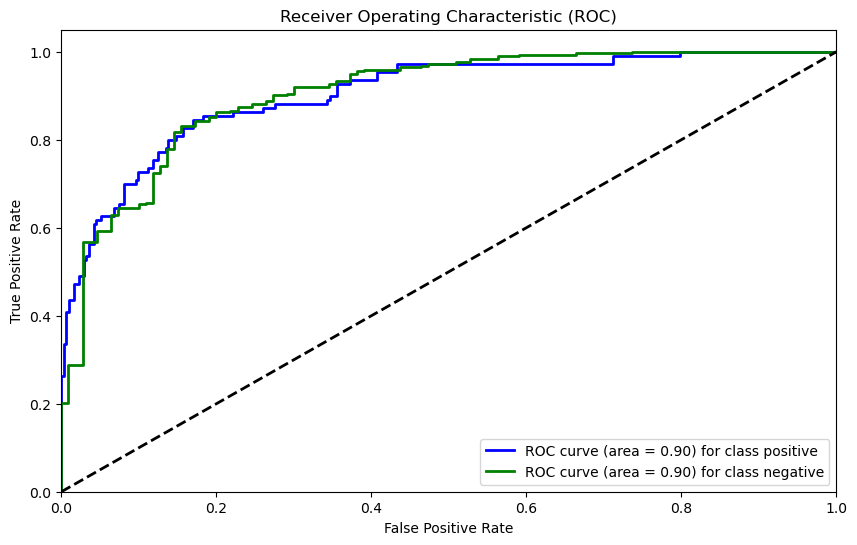

              precision    recall  f1-score   support

    positive       0.57      0.40      0.47        10
    negative       0.95      0.98      0.97       130

    accuracy                           0.94       140
   macro avg       0.76      0.69      0.72       140
weighted avg       0.93      0.94      0.93       140

ROC AUC Score: 0.69


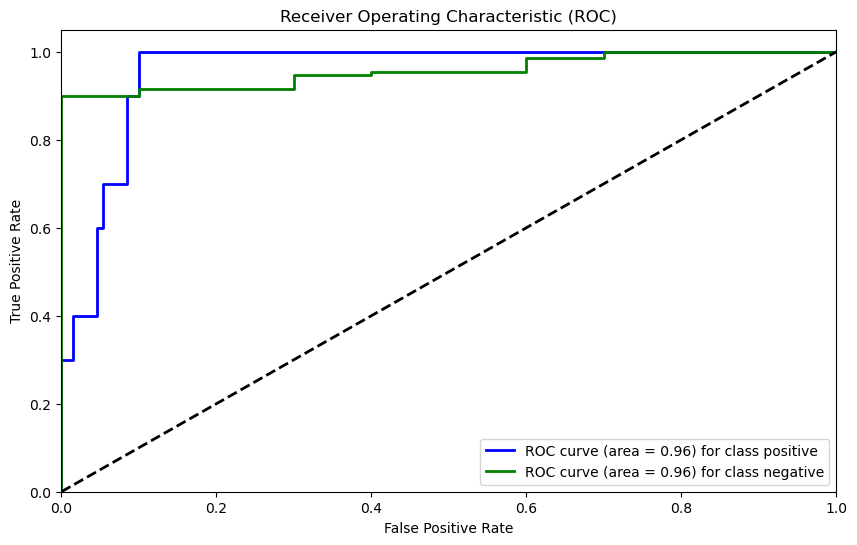

              precision    recall  f1-score   support

    positive       0.88      0.61      0.72        92
    negative       0.44      0.78      0.56        36

    accuracy                           0.66       128
   macro avg       0.66      0.69      0.64       128
weighted avg       0.75      0.66      0.67       128

ROC AUC Score: 0.69


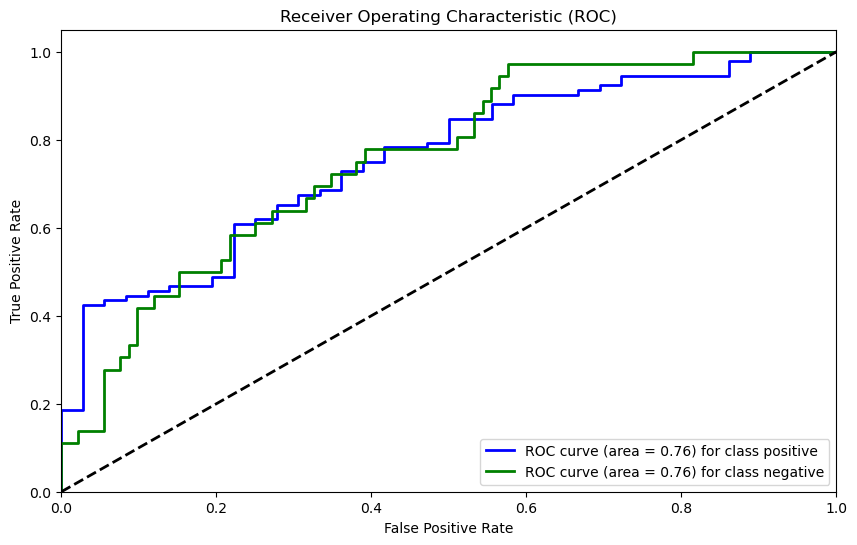

              precision    recall  f1-score   support

    negative       0.78      0.80      0.79        88
    positive       0.89      0.88      0.88       162

    accuracy                           0.85       250
   macro avg       0.83      0.84      0.83       250
weighted avg       0.85      0.85      0.85       250

ROC AUC Score: 0.84


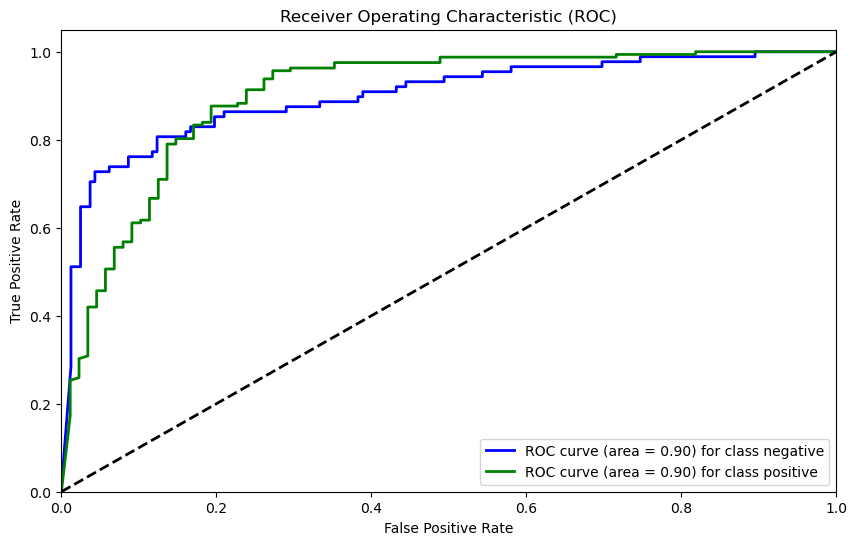

              precision    recall  f1-score   support

    positive       0.14      0.10      0.12        10
    negative       0.93      0.95      0.94       133

    accuracy                           0.90       143
   macro avg       0.54      0.53      0.53       143
weighted avg       0.88      0.90      0.89       143

ROC AUC Score: 0.53


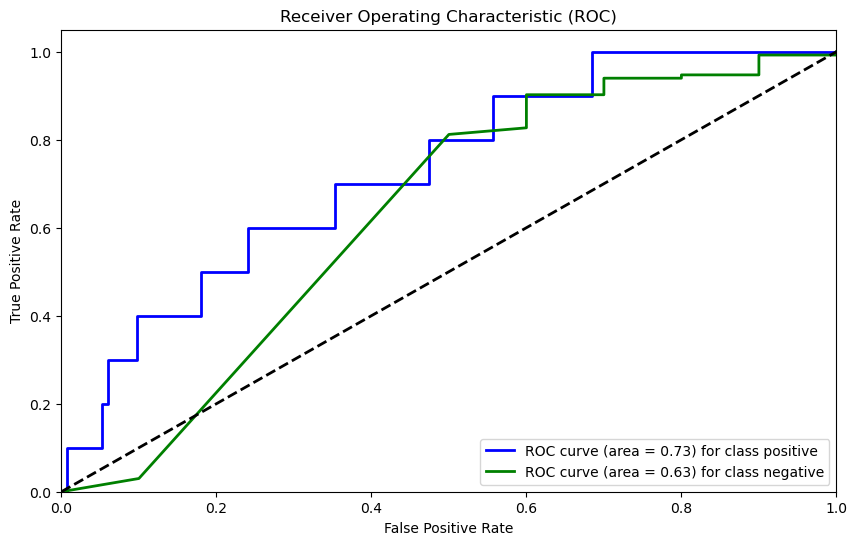

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85       198
    positive       0.85      0.81      0.83       181

    accuracy                           0.84       379
   macro avg       0.85      0.84      0.84       379
weighted avg       0.84      0.84      0.84       379

ROC AUC Score: 0.84


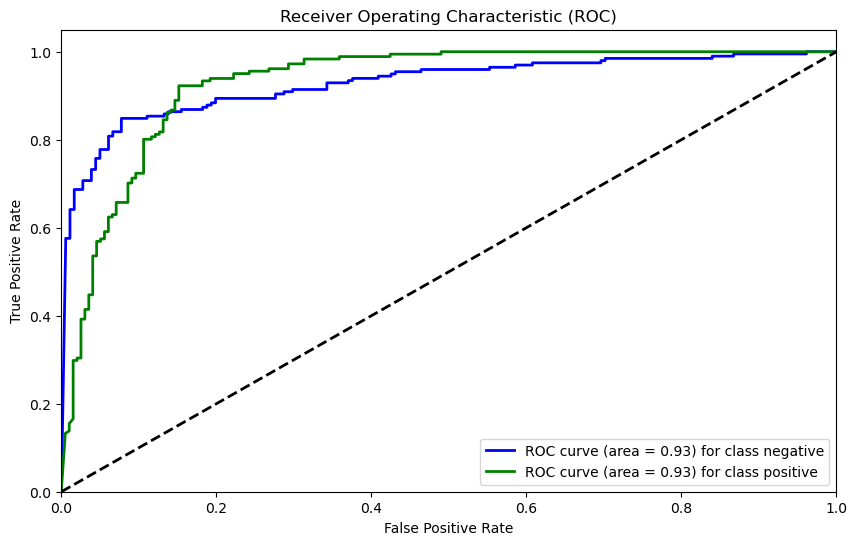

              precision    recall  f1-score   support

    negative       0.25      0.08      0.12        13
    positive       0.86      0.96      0.91        78

    accuracy                           0.84        91
   macro avg       0.56      0.52      0.51        91
weighted avg       0.77      0.84      0.80        91

ROC AUC Score: 0.52


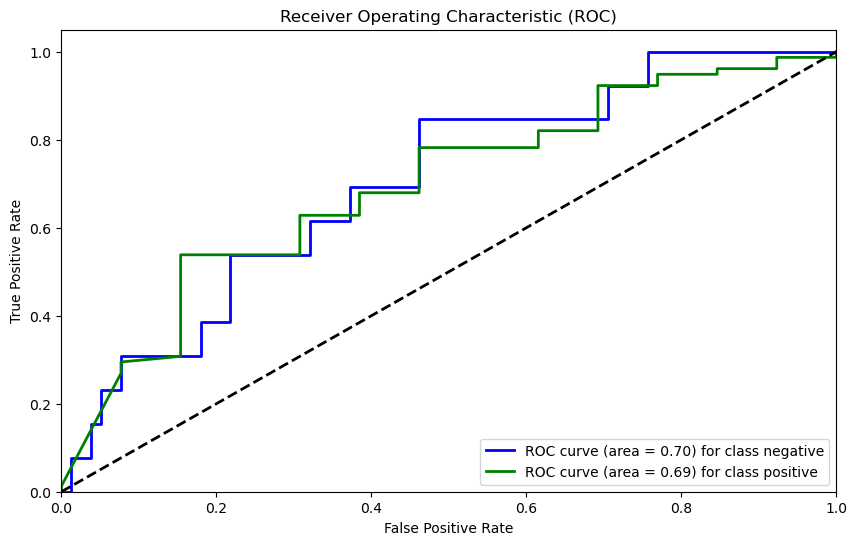

              precision    recall  f1-score   support

    positive       0.77      0.72      0.75        57
    negative       0.89      0.91      0.90       138

    accuracy                           0.86       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.85      0.86      0.85       195

ROC AUC Score: 0.82


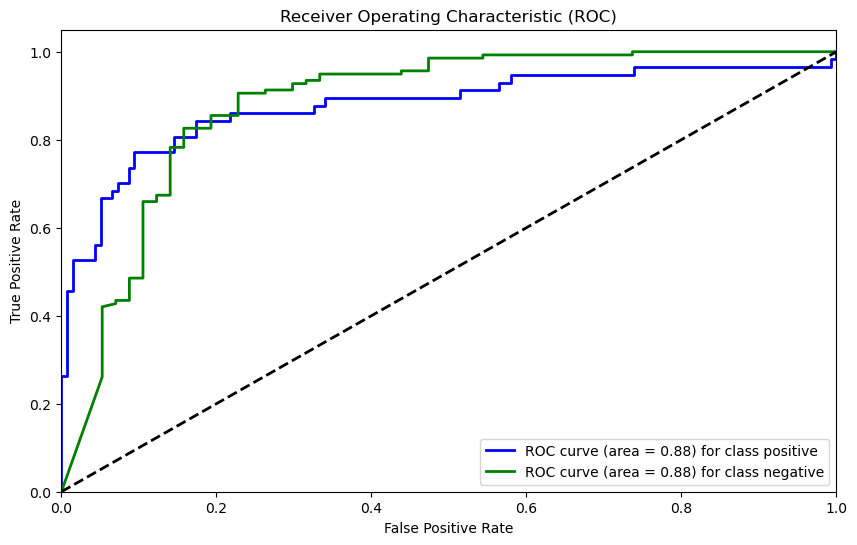

In [44]:
roc_curve_report(p1_datasets,P01_y_pred,y_test_P01,y_pred_labels_P01)
roc_curve_report(p2_datasets,P02_y_pred,y_test_P02,y_pred_labels_P02)
roc_curve_report(p3_datasets,P03_y_pred,y_test_P03,y_pred_labels_P03)
roc_curve_report(p5_datasets,P05_y_pred,y_test_P05,y_pred_labels_P05)
roc_curve_report(p6_datasets,P06_y_pred,y_test_P06,y_pred_labels_P06)
roc_curve_report(p8_datasets,P08_y_pred,y_test_P08,y_pred_labels_P08)
roc_curve_report(p11_datasets,P11_y_pred,y_test_P11,y_pred_labels_P11)
roc_curve_report(p16_datasets,P16_y_pred,y_test_P16,y_pred_labels_P16)

In [45]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1score_P01 = f1_score(y_test_P01, y_pred_labels_P01,average='weighted')
f1score_P02 = f1_score(y_test_P02, y_pred_labels_P02,average='weighted')
f1score_P03 = f1_score(y_test_P03, y_pred_labels_P03,average='weighted')
f1score_P05 = f1_score(y_test_P05, y_pred_labels_P05,average='weighted')
f1score_P06 = f1_score(y_test_P06, y_pred_labels_P06,average='weighted')
f1score_P08 = f1_score(y_test_P08, y_pred_labels_P08,average='weighted')
f1score_P11 = f1_score(y_test_P11, y_pred_labels_P11,average='weighted')
f1score_P16 = f1_score(y_test_P16, y_pred_labels_P16,average='weighted')
print("F1 Score:", f1score_P01)
print("F1 Score:", f1score_P02)
print("F1 Score:", f1score_P03)
print("F1 Score:", f1score_P05)
print("F1 Score:", f1score_P06)
print("F1 Score:", f1score_P08)
print("F1 Score:", f1score_P11)
print("F1 Score:", f1score_P16)

F1 Score: 0.8457079429927036
F1 Score: 0.9304086653672875
F1 Score: 0.6735256410256412
F1 Score: 0.8483818828948285
F1 Score: 0.8864343616147684
F1 Score: 0.8440723770703514
F1 Score: 0.7960275019098548
F1 Score: 0.8548251748251748


In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function
def show_confusionmatrix(confusion,dataset,person):
    
    # Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
    class_sums = np.sum(confusion, axis=1)

    # Normalize the confusion matrix by dividing each entry by the respective class sum
    normalized_confusion = confusion / class_sums[:, np.newaxis]

    # Extract unique class labels from the 'Label' column
    class_labels = dataset['Label'].unique()

    # Convert class labels to a list
    class_labels = list(class_labels)

    # Create a heatmap to visualize the normalized confusion matrix (without percentages)
    plt.figure(figsize=(4, 3))
    sns.heatmap(normalized_confusion, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Normalized confusion matrix for {person}')
    plt.show()
    



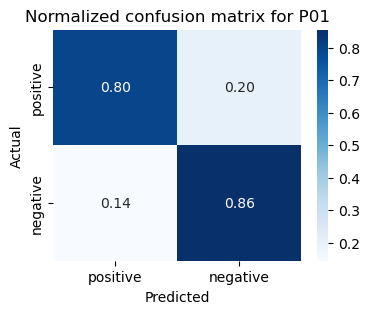

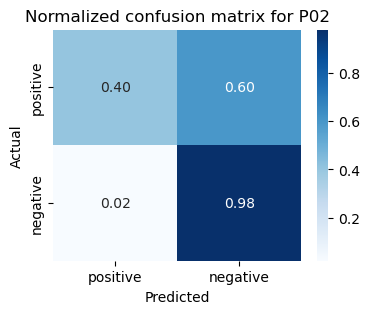

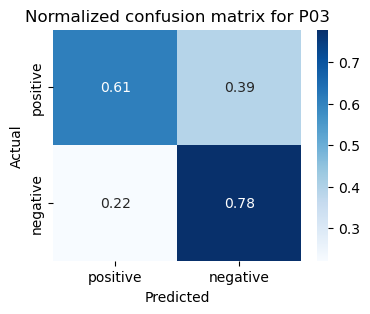

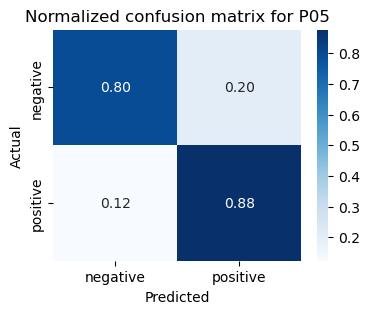

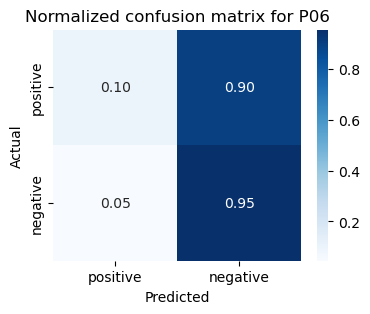

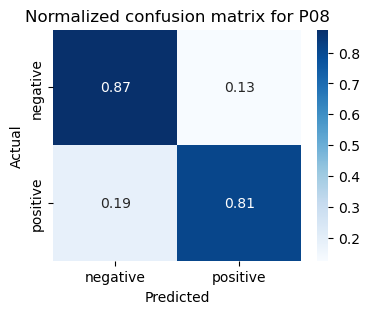

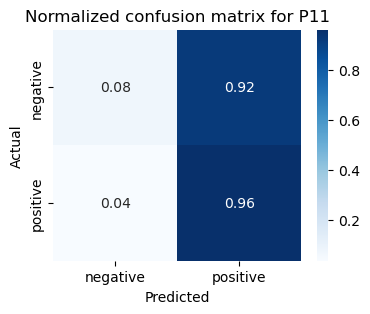

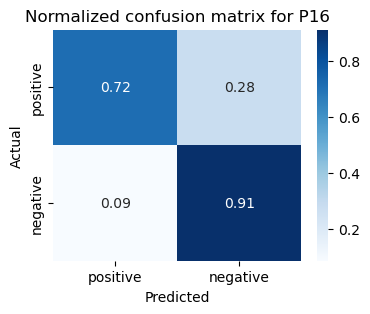

In [47]:

stack_confusion = [confusion_P01, confusion_P02, confusion_P03, confusion_P05, confusion_P06, confusion_P08,
                   confusion_P11,confusion_P16]
dataset_list = [p1_datasets, p2_datasets, p3_datasets, p5_datasets, p6_datasets, p8_datasets, p11_datasets, p16_datasets]
person=['P01','P02','P03','P05','P06','P08','P11','P16']
for i in range(len(stack_confusion)):
    show_confusionmatrix(stack_confusion[i], dataset_list[i],person[i])

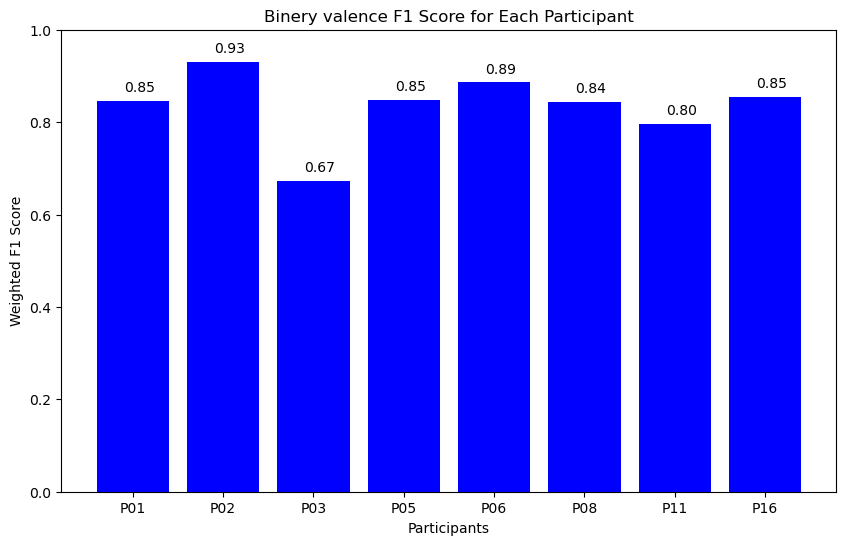

In [48]:
import matplotlib.pyplot as plt

# F1 scores for each participant and their corresponding labels
f1_scores = [f1score_P01, f1score_P02, f1score_P03, f1score_P05, f1score_P06, f1score_P08, f1score_P11, f1score_P16]
participants = ["P01", "P02", "P03", "P05", "P06", "P08", "P11", "P16"]

# Plot the F1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(participants, f1_scores, color='blue')
plt.xlabel('Participants')
plt.ylabel('Weighted F1 Score')
plt.title('Binery valence F1 Score for Each Participant')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1

# Display the F1 scores over the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.2f}', fontsize=10)

plt.show()

In [49]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1score_P01 = f1_score(y_test_P01, y_pred_labels_P01,average='weighted')
f1score_P02 = f1_score(y_test_P02, y_pred_labels_P02,average='weighted')
f1score_P03 = f1_score(y_test_P03, y_pred_labels_P03,average='weighted')
f1score_P05 = f1_score(y_test_P05, y_pred_labels_P05,average='weighted')
f1score_P06 = f1_score(y_test_P06, y_pred_labels_P06,average='weighted')
f1score_P08 = f1_score(y_test_P08, y_pred_labels_P08,average='weighted')
f1score_P11 = f1_score(y_test_P11, y_pred_labels_P11,average='weighted')
f1score_P16 = f1_score(y_test_P16, y_pred_labels_P16,average='weighted')
print("F1 Score:", f1score_P01)
print("F1 Score:", f1score_P02)
print("F1 Score:", f1score_P03)
print("F1 Score:", f1score_P05)
print("F1 Score:", f1score_P06)
print("F1 Score:", f1score_P08)
print("F1 Score:", f1score_P11)
print("F1 Score:", f1score_P16)

F1 Score: 0.8457079429927036
F1 Score: 0.9304086653672875
F1 Score: 0.6735256410256412
F1 Score: 0.8483818828948285
F1 Score: 0.8864343616147684
F1 Score: 0.8440723770703514
F1 Score: 0.7960275019098548
F1 Score: 0.8548251748251748


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function

# Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
class_sums = np.sum(confusion, axis=1)

# Normalize the confusion matrix by dividing each entry by the respective class sum
normalized_confusion = confusion / class_sums[:, np.newaxis]

# Extract unique class labels from the 'Label' column
class_labels = p1_datasetsd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap to visualize the normalized confusion matrix (in percentage form)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion, annot=True, fmt='.2', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


In [ ]:
def check_class(y_train,y_test):
    unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
    unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

    # Compare the unique classes in both sets
    if np.array_equal(unique_classes_train, unique_classes_test):
        print("All classes are present in both the training and test sets.")
    else:
        print("Classes are not consistent between training and test sets.")
check_class(y_train_P01,y_test_P01)
check_class(y_train_P02,y_test_P02)
check_class(y_train_P03,y_test_P03)
check_class(y_train_P05,y_test_P05)
check_class(y_train_P06,y_test_P06)
check_class(y_train_P08,y_test_P08)
check_class(y_train_P11,y_test_P11)
check_class(y_train_P16,y_test_P16)

In [ ]:
# Load your dataset (you can use your data loading code here)
df = pd.read_csv("dataset_file_directory.csv")
dfs=df[~df['Label'].isin([ 'glee','more','tablet','hunger','greeting','laugh','help','bathroom'])]


dfsd = dfs.copy()
# Define a mapping of old labels to new valence-based labels
valence_mapping = {
       'selftalk'  :   'positive',
    'frustrated'   :   'negative',
    'delighted'    :   'positive',
    'dysregulated' :   'negative',
    'social'       :   'positive',
    'request'      :   'positive',
    'affectionate' :   'positive',
    'yes'          :   'positive',
    'laughter'     :   'positive',
    'dysregulation-sick' : 'negative',
    'happy'   :        'positive',
    'protest'  :       'negative',
    'dysregulation-bathroom' :'negative',
    'no '    :         'negative',
}



# Update the 'Label' column based on the valence mapping
dfsd['Label'] = dfsd['Label'].map(valence_mapping)

test_percentage = 1
df20 = dfsd.sample(frac=test_percentage, random_state=42)



In [ ]:
# Print the updated DataFrame
print(dfsd['Label'].nunique())


dfsd.isnull()

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers

# Define the create_model function for the CNN
def create_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        layers.Conv1D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling1D(2),
        layers.Conv1D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling1D(2),
        layers.Conv1D(256, 3, activation='relu', padding='same'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



# Define the directory where audio files are located
script_dir = r"C:\Users\pawan\Desktop\mv\downloaddataset"
wav_dir = os.path.join(script_dir, "downloaded_wav_files")

# Define a function to extract audio features (you can use your feature extraction code here)
def extract_audio_features(dataset):
    features_list = []
    labels_list = []
    for index, row in dataset.iterrows():
        filename = row['Filename']
        label = row['Label']
        wav_file_path = os.path.join(wav_dir, filename)
        if os.path.exists(wav_file_path):
            try:
                # Load the WAV file using librosa
                audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

                # Perform feature extraction (e.g., MFCCs)
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
                chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
               
                mfccs_mean = np.mean(mfccs, axis=1)
                chroma_mean = np.mean(chroma, axis=1)
                spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
            
                combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))
                # Append the extracted features and label to the lists
                features_list.append(combined_feature_vector)
                labels_list.append(label)

            except Exception as e:
                print(f"Error processing {wav_file_path}: {str(e)}")
        else:
            null_file +=1
            print(f"Audio file not found: {wav_file_path}")

    return np.array(features_list), np.array(labels_list)

# # Filter out labels that are not common in the training data
train_labels = set(df20['Label'].unique())
# df20 = df20[df20['Label'].isin(train_labels)]

# Extract audio features from your dataset
X, y = extract_audio_features(p1_datasets)

# Define LOSO cross-validation with session stratification
logo = LeaveOneOut()

# Initialize a list to store F1 scores
f1_scores = []

# Encode labels using LabelEncoder after filtering labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Iterate over participants using LOSO cross-validation
for train_index, test_index in logo.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Define the input shape and number of classes based on your data
    input_shape = X_train.shape[1]
    num_classes = len(train_labels)
    
    # Create the CNN model
    model = create_model(input_shape, num_classes)
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=42, validation_split=0.2, verbose=1)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate and print the F1 score for the session
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    print("F1 Score:", f1)

    # Append the F1 score to the list
    f1_scores.append(f1)

# Calculate and print the mean F1 score across sessions
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)


In [ ]:
import matplotlib.pyplot as plt

# F1 scores for each participant and their corresponding labels

participants = ["P01", "P02", "P03", "P05", "P06", "P08", "P11", "P16"]

# Plot the F1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(participants, f1_scores, color='blue')
plt.xlabel('Participants')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score for Each Participant')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1

# Display the F1 scores over the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.2f}', fontsize=10)

plt.show()
